### Homework 6 
 Option A 
 
**** Still in progress; trying to get every trial run of 'N' to plot together. Seems like it should just work the way I did it.. but I am clearly missing something. 

**** Without the extra for loop to run different options for 'N'; increasing N values created situations where the mean fit never achieved high fit--possibly getting stuck in local maximums. 
    

In [39]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [40]:
from pandas import *
import random

In [41]:
def makePopulation(N,popSize):
    population=list()
    for p in range(popSize):
        genome=list()
        for n in range(N):
            genome.append(random.randint(0,1))
        population.append(genome)
    return population

print makePopulation(5,10)



[[0, 1, 1, 1, 1], [0, 1, 0, 1, 0], [0, 0, 0, 1, 0], [0, 1, 1, 1, 0], [1, 0, 0, 0, 1], [0, 1, 1, 1, 0], [0, 0, 1, 1, 1], [0, 1, 1, 1, 1], [1, 1, 1, 0, 0], [0, 1, 1, 0, 1]]


In [54]:
def computeFitness(genome):
    fitness=sum(genome)/float(len(genome))
    return fitness
print computeFitness([1,0,1,1])

0.75


In [45]:
def makeMutant(genome,mutationRate):
    newGenome=list()
    for i in range(len(genome)):
        if random.uniform(0.0,1.0)<mutationRate:
            newGenome.append(1-genome[i])
        else:
            newGenome.append(genome[i])
    return newGenome

random.seed(0)

for i in range(10):
    print makeMutant([0,0,0,0,0],0.3)

[0, 0, 0, 1, 0]
[0, 0, 0, 0, 0]
[0, 0, 1, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 1, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 1, 0]
[0, 1, 0, 1, 0]


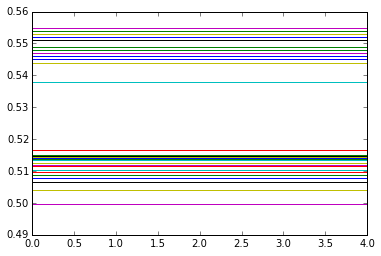

In [146]:
random.seed(0)
# this run is to get it to plot my different 'N' runs together..
#create a population
popSize=100
population=makePopulation(N,popSize)
generations=5
mutationRate=0.01
meanW=list()
maxW=list()


Round=[12,50,100,1000]
for i in range(len(Round)):
    PmeanW=list()
    PmaxW=list()
    N=Round[i]
    for generation in range(generations):
        W=list()
        for i in range(len(population)):
            W.append(computeFitness(population[i]))


        nextGeneration=list()
        meanW.append(mean(W))
        highestFitness=max(W)
        maxW.append(highestFitness)

        while len(nextGeneration)<popSize:
            who=random.randint(0,popSize-1)
            while (random.uniform(0.0,1.0)>(W[who]/highestFitness)):
                who=random.randint(0,popSize-1)
            nextGeneration.append(makeMutant(population[who],mutationRate))
        population=list(nextGeneration)
        PmeanW.append(meanW)
        PmaxW.append(maxW)
    plot(PmeanW)
    plot(PmaxW)

In [ ]:
random.seed(0)

#create a population
N=50
popSize=10
population=makePopulation(N,popSize)
generations=50
mutationRate=0.01
meanW=list()
maxW=list()


for generation in range(generations):
        W=list()
        for i in range(len(population)):
            W.append(computeFitness(population[i]))


        nextGeneration=list()
        meanW.append(mean(W))
        highestFitness=max(W)
        maxW.append(highestFitness)

        while len(nextGeneration)<popSize:
            who=random.randint(0,popSize-1)
            while (random.uniform(0.0,1.0)>(W[who]/highestFitness)):
                who=random.randint(0,popSize-1)
            nextGeneration.append(makeMutant(population[who],mutationRate))
        population=list(nextGeneration)
plot(meanW,"g")
plot(maxW, "r")
print population